In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from cycler import cycler
from IPython.display import display
import datetime
import scipy.stats
from matplotlib.colors import ListedColormap
import math
import random
import requests
import datetime
import json

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.calibration import CalibrationDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
circuits = pd.read_csv("./f1_data/circuits.csv")
constructor_results = pd.read_csv("./f1_data/constructor_results.csv")
constructor_standings = pd.read_csv("./f1_data/constructor_standings.csv")
constructors = pd.read_csv("./f1_data/constructors.csv")
driver_standings = pd.read_csv("./f1_data/driver_standings.csv")
drivers = pd.read_csv("./f1_data/drivers.csv")
lap_times = pd.read_csv("./f1_data/lap_times.csv")
pit_stops = pd.read_csv("./f1_data/pit_stops.csv")
qualifying = pd.read_csv("./f1_data/qualifying.csv")
races = pd.read_csv("./f1_data/races.csv")
results = pd.read_csv("./f1_data/results.csv")
seasons = pd.read_csv("./f1_data/seasons.csv")
status = pd.read_csv("./f1_data/status.csv")

# Circuit History

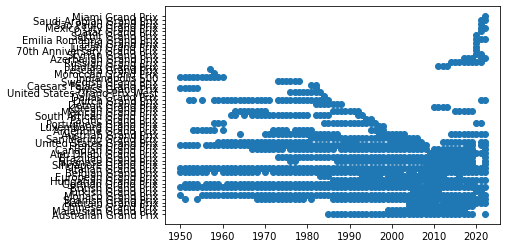

In [31]:
plt.scatter(races['year'], races['name'])
plt.show()

# Circuit Features

In [85]:
quali_win_corr = pd.merge(results, races, on='raceId', how='left')[['name', 'grid', 'position']]
nan_q = quali_win_corr['position'].value_counts().keys()[0]
quali_win_corr['position'].replace(nan_q, np.nan, inplace=True)
quali_win_corr['position'] = pd.to_numeric(quali_win_corr['position'])

f = open('./f1_data/country_codes.json', 'r')
country_codes = json.load(f)

f = open('./f1_data/drop_names.json', 'r')
drop_names = json.load(f)


keepNames = quali_win_corr['name'].value_counts().iloc[:40]

for name in keepNames.keys():
    if name in drop_names:
        del keepNames[name]
circ_features = quali_win_corr[quali_win_corr['name'].isin(keepNames.keys())].groupby('name')[['grid', 'position']].corr().iloc[0::2,-1].reset_index()[['name', 'position']]
circ_features['country_code'] =  circ_features['name'].map(country_codes)
circ_features['freq'] =  circ_features['name'].map(dict(keepNames))
circ_features = circ_features.fillna('')
circ_features.sort_values(by=['position'], inplace=True)